In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

cases = pd.read_excel('PUBLIC_CDC_Event_Date_SARS.xlsx')
hosp = pd.read_excel('PUBLIC_CDC_Event_Date_SARS.xlsx', sheet_name=1)
cases['WeekStartDate'] = pd.to_datetime(cases['WeekStartDate'])
hosp_unknown = hosp[hosp['WeekStartDate'] == 'Unknown']
hosp = hosp[hosp['WeekStartDate'] != 'Unknown']
hosp['WeekStartDate'] = pd.to_datetime(hosp['WeekStartDate'])

hosp['Week'] = (hosp.WeekStartDate - pd.datetime(2020,1,5))/np.timedelta64(1, "W")
cases['Week'] = (cases.WeekStartDate - pd.datetime(2020,1,5))/np.timedelta64(1, "W")

hosp = hosp.rename(columns={"Hospitalizations":"Total"})
cases = cases.rename(columns={"NewPos_All":"Total"})


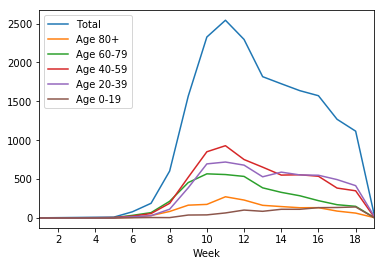

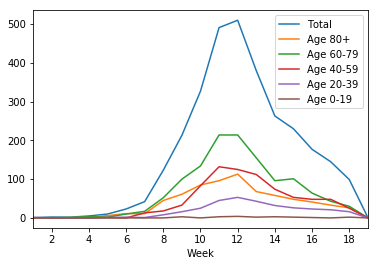

In [2]:
cases_totals = cases.groupby('Week').agg('sum')
hosp_totals = hosp.groupby('Week').agg('sum')

cases_totals[['Total', 'Age 80+', 'Age 60-79', 'Age 40-59', 'Age 20-39', 'Age 0-19']].plot()

hosp_totals[['Total', 'Age 80+', 'Age 60-79', 'Age 40-59', 'Age 20-39', 'Age 0-19']].plot()

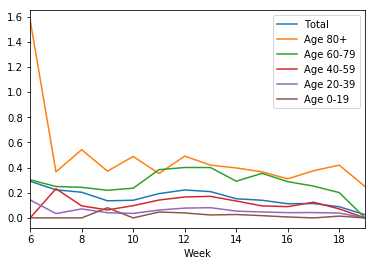

In [7]:
ratios = hosp_totals/cases_totals

ratios = ratios.drop(['Positive UnkAge'], axis=1)
ratios = ratios.dropna()

ratios[['Total', 'Age 80+', 'Age 60-79', 'Age 40-59', 'Age 20-39', 'Age 0-19']].plot()

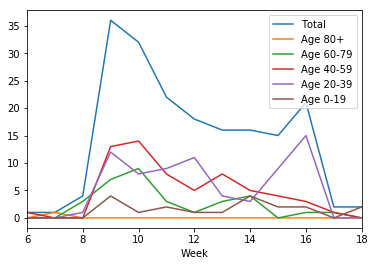

In [21]:
cases_counties = cases.groupby(['County', 'Week']).agg('sum')
#hosp_totals = hosp.groupby('Week').agg('sum')
cases_counties.loc['Grant County'][['Total', 'Age 80+', 'Age 60-79', 'Age 40-59', 'Age 20-39', 'Age 0-19']].plot()

#hosp_totals[['Total', 'Age 80+', 'Age 60-79', 'Age 40-59', 'Age 20-39', 'Age 0-19']].plot()

In [32]:
cases_counties.loc['King County', 6]

Total              46
Age 0-19            1
Age 20-39           8
Age 40-59          10
Age 60-79          21
Age 80+             6
Positive UnkAge     0
Name: (King County, 6.0), dtype: int64